<a href="https://colab.research.google.com/github/rhyan05/Machine-Learning/blob/main/Agrupamento/naoSup_argrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [ ]:
#Importar as bibliotecas
import numpy as np
import pandas as pd

In [ ]:
#Importar uma biblioteca para ignorar algumas mensagens de atenção
#que na realidade não precisa
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carregar o aquivo usando a variável df -> rodar a celula, ir no simbolo das pastas -> drive- my drive -> procura o arquivo -> botao direito ou ir nos tres pontinhos -> copiar caminho
df = pd.read_csv('/content/drive/MyDrive/seu caminho',
                    sep=',', encoding='iso-8859-1')

In [ ]:
#Verificar a tabela
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Analisamos os dados:**

**IDADE** = Age

**ATRIBUTOS:**

CustomerID: identificação do cliente.

Genre: Gênero.

Age: idade.

Annual Income (k$):	Rendimento anual.

Spending Score (1 a 100): Pontuação de gastos.

In [ ]:
#Importar o recurso para fazer gráfico
import plotly.express as px

In [ ]:
# Fazer histograma
hist =  px.histogram (df,  x = "Age", nbins=60)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist.show()

**GÊNERO**

In [ ]:
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [ ]:
df['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
42,8
55,7
46,6
73,6
35,5
...,...
31,1
44,1
53,1


In [ ]:
df['Annual Income (k$)'].value_counts()

,count
Annual Income (k$),
54,12
78,12
48,6
71,6
63,6
...,...
58,2
59,2
16,2


In [ ]:
# Fazer histograma
hist =  px.histogram (df,  x = "Annual Income (k$)", nbins=50)
hist.update_layout(width=600,height=400,title_text='Distribuição dos Redimentos')
hist.show()

In [ ]:
#Importar outro recurso para fazer gráfico
import seaborn as sns

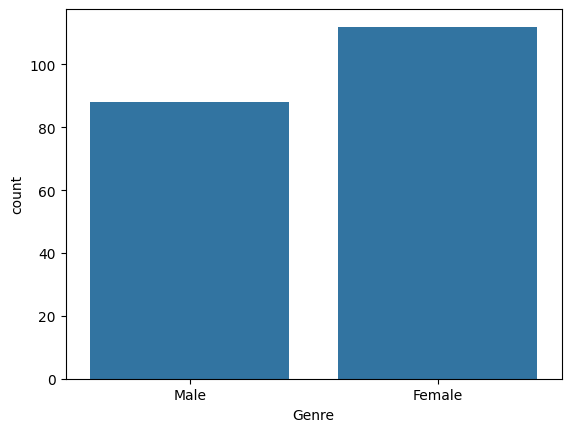

In [ ]:
# Grafico basico
sns.countplot(x='Genre', data=df);

In [ ]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [ ]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
# Vamos renomear os campos, para quem quiser, para português
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [ ]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [ ]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True)

In [ ]:
#Vamos verificar
df.head(3)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [ ]:
# RELAÇÃO DA QUANTIDADE de dados perdidos
df.isnull().sum()

,0
identificacao,0
genero,0
idade,0
rendimento,0
pontuacao,0


**Análise dos tipos de atributos.**

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

,0
identificacao,int64
genero,object
idade,int64
rendimento,int64
pontuacao,int64


**Dados Estatísticos**

In [ ]:
# Mostrar os dados em formato estatística
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Análise dos outliers**

In [ ]:
import plotly.express as px

In [ ]:
boxplot = px.box(df, y="rendimento")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [ ]:
df.head(2)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81


###**Excluir identificação do cliente**

In [ ]:
#A coluna identificação nao interessa para nós e criar uma outra copia
# axis = 1 para coluna; axis = 0 para linha
df2 = df.drop(labels = 'identificacao', axis = 1)

In [ ]:
df2.head()

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###**Transformar variáveis categóricas em numéricas**

In [ ]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [ ]:
df2.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


###**Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [ ]:
df2_esc

## **K-MEANS COM DOIS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
#Escolhemos duas colunas: redimento e pontuação
dados = df2.iloc[:, [2,3]].values

In [ ]:
dados

**Elbow Method**

In [ ]:
#Importar algortmo K-means
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

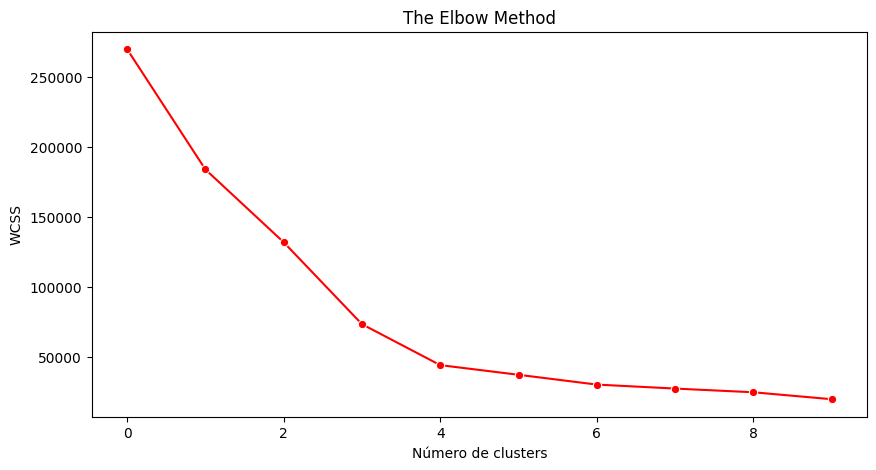

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
#Fazer o treinamento de dados
kmeans1 = kmeans.fit(dados)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[26.30434783, 20.91304348],
       [48.26      , 56.48      ],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [ ]:
dados[3,:]

array([16, 77])

In [ ]:
classificacao[3]

1

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Juntar dois graficos
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [ ]:
#Verifcar a classificação do agrupamento
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,1
2,0
3,1
4,0
...,...
195,3
196,2
197,3
198,2


In [ ]:
#Concanetar com a tabela de dados
df3 = pd.concat([df, agrupamento],axis=1)
df3

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [ ]:
#consultar um cliente na linha 150
df3.iloc[150 , :]

,150
identificacao,151
genero,Male
idade,43
rendimento,78
pontuacao,17
Grupo,2


In [ ]:
#Consulta em outra forma pela identificação
df3.loc[df3.identificacao == 92]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,1


In [ ]:
#Separar os grupos
grupo0 = df3.loc[df3.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


In [ ]:
grupo0.shape

(23, 6)

In [ ]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,identificacao,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
...,...,...,...,...,...,...
118,119,Female,51,67,43,1
119,120,Female,50,67,57,1
120,121,Male,27,67,56,1
121,122,Female,38,67,40,1


In [ ]:
grupo1.shape

(100, 6)

## **K-MEANS COM TODOS ATRIBUTOS**

In [ ]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

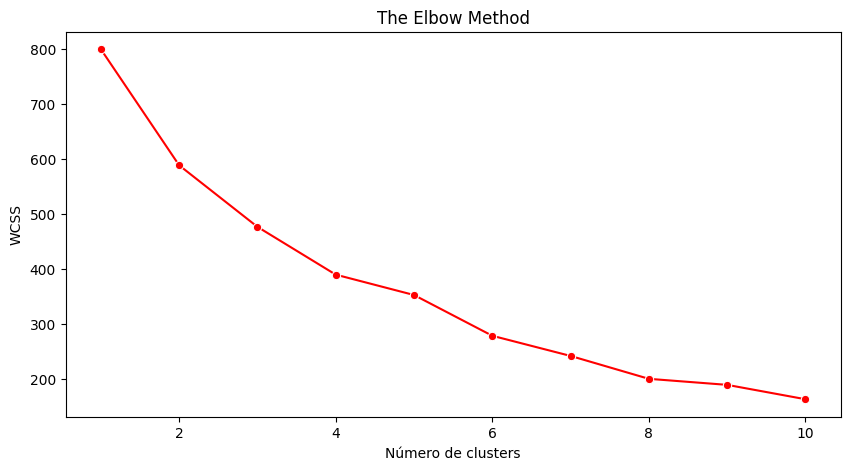

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans2 = kmeans.fit(df2_esc)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.88640526,  0.70849671, -0.00229017, -0.56133101],
       [ 0.04339047, -0.44191719,  0.99158305,  1.23950275],
       [ 1.12815215,  1.33075947, -0.48486081, -0.42786906],
       [ 1.12815215, -1.02205127, -0.75821082,  0.43783969],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355]])

In [ ]:
# Inversão do escalonamento: faz escalonamento para centroide
escala.inverse_transform(kmeans2.cluster_centers_)

array([[-2.77555756e-16,  4.87222222e+01,  6.05000000e+01,
         3.57407407e+01],
       [ 4.61538462e-01,  3.26923077e+01,  8.65384615e+01,
         8.21282051e+01],
       [ 1.00000000e+00,  5.73928571e+01,  4.78571429e+01,
         3.91785714e+01],
       [ 1.00000000e+00,  2.46086957e+01,  4.06956522e+01,
         6.14782609e+01],
       [ 1.00000000e+00,  3.84736842e+01,  8.58947368e+01,
         1.42105263e+01],
       [ 1.66533454e-16,  2.59459459e+01,  4.22162162e+01,
         5.74594595e+01]])

In [ ]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([3, 3, 5, 5, 5, 5, 0, 5, 2, 5, 2, 5, 0, 5, 2, 3, 5, 3, 2, 5, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 5, 2, 5, 2, 3, 0, 5, 0, 5, 0, 5, 0, 3, 2, 5,
       0, 5, 0, 5, 5, 5, 0, 3, 5, 2, 0, 2, 0, 2, 5, 2, 2, 3, 0, 0, 2, 3,
       0, 0, 3, 5, 2, 0, 0, 0, 2, 3, 0, 2, 5, 0, 2, 3, 2, 0, 5, 2, 0, 5,
       5, 0, 0, 3, 2, 0, 5, 3, 0, 5, 2, 3, 5, 0, 2, 3, 2, 5, 0, 2, 2, 2,
       2, 5, 0, 3, 5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 5, 1, 4, 1, 2, 1, 4, 1,
       5, 1, 4, 1, 0, 1, 4, 1, 0, 1, 5, 1, 4, 1, 4, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 0, 1,
       4, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1], dtype=int32)

In [ ]:
classificacao2[199]

1

In [ ]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,3
1,3
2,5
3,5
4,5
...,...
195,1
196,0
197,1
198,4


In [ ]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,5
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [ ]:
df4.iloc[125 , :]

,125
identificacao,126
genero,Female
idade,31
rendimento,70
pontuacao,77
Grupo,1


In [ ]:
df4.loc[df4.identificacao == 76]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,3


In [ ]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
6,7,Female,35,18,6,0
12,13,Female,58,20,15,0
22,23,Female,46,25,5,0
24,25,Female,54,28,14,0
26,27,Female,45,28,32,0
28,29,Female,40,29,31,0
34,35,Female,49,33,14,0
36,37,Female,42,34,17,0
38,39,Female,36,37,26,0
40,41,Female,65,38,35,0


In [ ]:
grupo0.shape

(54, 6)